<a href="https://colab.research.google.com/github/Shuichiro-T/gijutsushoten12_get_along_with_estat_program/blob/main/eStat%E3%81%A8%E4%BB%B2%E8%89%AF%E3%81%8F%E3%81%AA%E3%82%8B%E6%9C%AC_%E5%88%86%E6%9E%90%E7%B7%A8%EF%BC%88%E4%BB%98%E9%8C%B2%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandasの使い方

例示用データのダウンロード（WHOより）

WHOより提供されている、Covid-19の情報に関するオープンデータを使用する
https://covid19.who.int/WHO-COVID-19-global-data.csv



In [1]:
!curl -O https://covid19.who.int/WHO-COVID-19-global-data.csv
!column -s, -t WHO-COVID-19-global-data.csv | head 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7662k  100 7662k    0     0  12.9M      0 --:--:-- --:--:-- --:--:-- 12.9M
﻿Date_reported  Country_code  Country                                         WHO_region                  New_cases  Cumulative_cases  New_deaths  Cumulative_deaths
2020-01-03     AF            Afghanistan                                     EMRO                        0          0                 0           0
2020-01-04     AF            Afghanistan                                     EMRO                        0          0                 0           0
2020-01-05     AF            Afghanistan                                     EMRO                        0          0                 0           0
2020-01-06     AF            Afghanistan                                     EMRO                        0          0                 0           0
2020-0

## DataFrameのコンストラクタ


二次元配列の例

In [2]:
import pandas as pd

df = pd.DataFrame(data = [[1,2,3], [4,5,6], [7,8,9]])

df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


二次元配列の例（インデックスとカラム名指定）

In [3]:
import pandas as pd

df = pd.DataFrame(data = [[1,2,3], [4,5,6], [7,8,9]],
                  index = ["key1", "key2", "key3"],
                  columns = ["value1", "value2", "value3"])

df

,value1,value2,value3
key1,1,2,3
key2,4,5,6
key3,7,8,9


辞書型の場合

In [4]:
import pandas as pd

df = pd.DataFrame(data = [
                            {"key": "key1", "value1": 1, "value2": 2, "value3": 3},
                            {"key": "key2", "value1": 4, "value2": 5, "value3": 6}, 
                            {"key": "key3", "value1": 7, "value2": 8, "value3": 9}
                          ])
df

,key,value1,value2,value3
0,key1,1,2,3
1,key2,4,5,6
2,key3,7,8,9


## データの読み込み

CSVを読み込む

In [5]:
import pandas as pd

df = pd.read_csv("./WHO-COVID-19-global-data.csv", sep=",")

df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
176086,2022-01-10,ZW,Zimbabwe,AFRO,373,222291,12,5160
176087,2022-01-11,ZW,Zimbabwe,AFRO,709,223000,20,5180
176088,2022-01-12,ZW,Zimbabwe,AFRO,765,223765,21,5201
176089,2022-01-13,ZW,Zimbabwe,AFRO,668,224433,14,5215


ヘッダーを指定する

In [6]:
import pandas as pd

df = pd.read_csv("./WHO-COVID-19-global-data.csv", sep=",", header=1)

df

,2020-01-03,AF,Afghanistan,EMRO,0,0.1,0.2,0.3
0,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
176085,2022-01-10,ZW,Zimbabwe,AFRO,373,222291,12,5160
176086,2022-01-11,ZW,Zimbabwe,AFRO,709,223000,20,5180
176087,2022-01-12,ZW,Zimbabwe,AFRO,765,223765,21,5201
176088,2022-01-13,ZW,Zimbabwe,AFRO,668,224433,14,5215


インデックスを指定する

In [7]:
import pandas as pd

df = pd.read_csv("./WHO-COVID-19-global-data.csv", 
                 header=0, 
                 sep=",", 
                 index_col=[0,3,1])

df

,,,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,WHO_region,Country_code,,,,,
2020-01-03,EMRO,AF,Afghanistan,0,0,0,0
2020-01-04,EMRO,AF,Afghanistan,0,0,0,0
2020-01-05,EMRO,AF,Afghanistan,0,0,0,0
2020-01-06,EMRO,AF,Afghanistan,0,0,0,0
2020-01-07,EMRO,AF,Afghanistan,0,0,0,0
...,...,...,...,...,...,...,...
2022-01-10,AFRO,ZW,Zimbabwe,373,222291,12,5160
2022-01-11,AFRO,ZW,Zimbabwe,709,223000,20,5180
2022-01-12,AFRO,ZW,Zimbabwe,765,223765,21,5201


使用するカラムを指定する

In [8]:
import pandas as pd

df = pd.read_csv("./WHO-COVID-19-global-data.csv", 
                 header=0, 
                 sep=",",
                 index_col=["Date_reported", "WHO_region", "Country_code"],
                 usecols=["Date_reported",
                          "WHO_region",
                          "Country_code",
                          "New_cases",
                          "New_deaths"])

df

,,,New_cases,New_deaths
Date_reported,WHO_region,Country_code,,
2020-01-03,EMRO,AF,0,0
2020-01-04,EMRO,AF,0,0
2020-01-05,EMRO,AF,0,0
2020-01-06,EMRO,AF,0,0
2020-01-07,EMRO,AF,0,0
...,...,...,...,...
2022-01-10,AFRO,ZW,373,12
2022-01-11,AFRO,ZW,709,20
2022-01-12,AFRO,ZW,765,21


## インデックスの解除

In [9]:
df_who = df.reset_index()

df_who

,Date_reported,WHO_region,Country_code,New_cases,New_deaths
0,2020-01-03,EMRO,AF,0,0
1,2020-01-04,EMRO,AF,0,0
2,2020-01-05,EMRO,AF,0,0
3,2020-01-06,EMRO,AF,0,0
4,2020-01-07,EMRO,AF,0,0
...,...,...,...,...,...
176086,2022-01-10,AFRO,ZW,373,12
176087,2022-01-11,AFRO,ZW,709,20
176088,2022-01-12,AFRO,ZW,765,21
176089,2022-01-13,AFRO,ZW,668,14


## データの取り出し

Seriesの取り出し

In [10]:
sr_new_cases = df_who["New_cases"]

sr_new_cases

0           0
1           0
2           0
3           0
4           0
         ... 
176086    373
176087    709
176088    765
176089    668
176090    651
Name: New_cases, Length: 176091, dtype: int64

DataFrameの取り出し

In [11]:
df_new_cases = df_who[["New_cases"]]


df_new_cases

,New_cases
0,0
1,0
2,0
3,0
4,0
...,...
176086,373
176087,709
176088,765
176089,668


条件を指定した取り出し

In [12]:
df_jpn = df_who[df_who["Country_code"] == "JP"]
#              ^(1)   ^(2)           ^(2)     ^(1)

df_jpn




,Date_reported,WHO_region,Country_code,New_cases,New_deaths
78015,2020-01-03,WPRO,JP,0,0
78016,2020-01-04,WPRO,JP,0,0
78017,2020-01-05,WPRO,JP,0,0
78018,2020-01-06,WPRO,JP,0,0
78019,2020-01-07,WPRO,JP,0,0
...,...,...,...,...,...
78753,2022-01-10,WPRO,JP,8144,1
78754,2022-01-11,WPRO,JP,6394,2
78755,2022-01-12,WPRO,JP,6829,2
78756,2022-01-13,WPRO,JP,12243,5


## ピボット変換

In [13]:
df_pivot = df_who.pivot(
    index="Date_reported", 
    columns="Country_code",
    values="New_cases")

df_pivot

Country_code,NaN,,AD,AE,AF,AG,AI,AL,AM,AO,AR,AS,AT,AU,AW,AZ,BA,BB,BD,BE,BF,BG,BH,BI,BJ,BL,BM,BN,BO,BR,BS,BT,BW,BY,BZ,CA,CD,CF,CG,CH,...,SX,SY,SZ,TC,TD,TG,TH,TJ,TK,TL,TM,TN,TO,TR,TT,TV,TZ,UA,UG,US,UY,UZ,VA,VC,VE,VG,VI,VN,VU,WF,WS,XA,XB,XC,XK,YE,YT,ZA,ZM,ZW
Date_reported,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,0,0,0,2759,36,214,0,1207,126,943,101689,0,10860,73340,0,555,1171,495,2231,11184,89,1716,1694,0,0,0,0,37,19013,49303,1497,21,0,577,0,32322,0,0,574,13101,...,0,20,54,127,0,0,7926,0,0,2,0,2579,0,61727,0,0,0,1969,749,335493,6374,389,0,0,414,0,403,23181,0,0,0,0,0,0,304,19,6040,4542,1328,373
2022-01-11,1309,0,1575,2562,13,0,165,793,243,598,73319,0,10441,51475,2138,329,942,342,2458,37607,0,6761,1894,255,0,0,0,44,5334,24382,870,28,2577,640,0,25466,721,196,0,32697,...,579,25,79,4,373,470,7133,0,0,2,0,1129,0,65236,397,0,0,5429,865,439168,5986,425,0,0,447,557,0,14818,0,0,0,418,0,35,236,11,769,2409,1485,709
2022-01-12,156,0,559,2511,58,0,0,2177,289,832,88352,0,11953,68387,499,673,2269,387,2916,31352,0,7062,1787,0,514,0,689,34,8857,34788,0,7,0,691,1181,56030,0,0,0,26527,...,201,25,119,83,0,273,7681,0,0,0,0,4865,0,74266,402,0,0,7117,670,1399136,6757,604,0,0,577,0,64,16035,0,0,0,87,16,13,356,12,1042,5668,2721,765


#Matplotlibの使い方

## サブプロットの取得

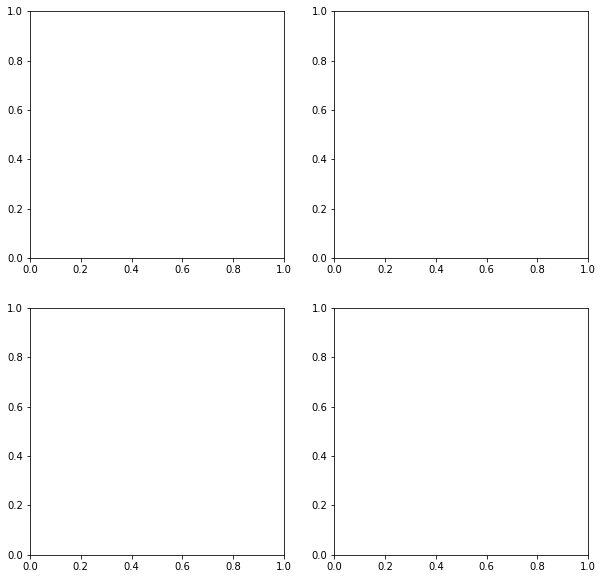

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10.0, 10.0), nrows=2,  ncols=2)

## グラフのデータを設定

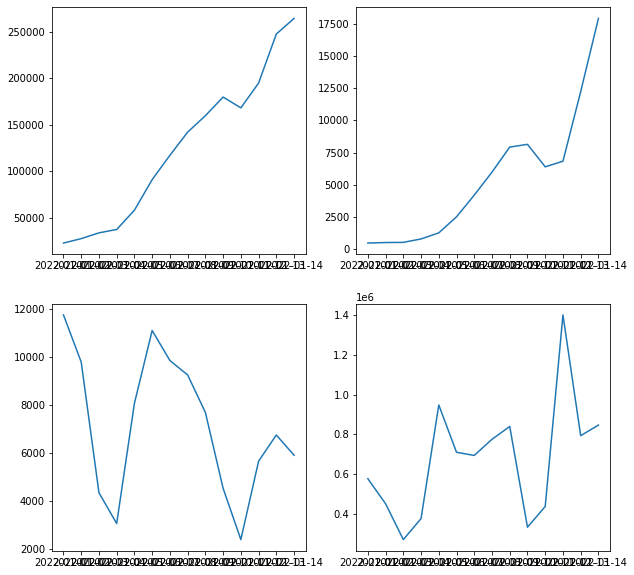

In [49]:
# 直近のデータを取得
df_who_recently = df_who[df_who["Date_reported"] >= "2022-01-01"]

# 各国のデータを取得
df_new_cases_jp = df_who_recently[df_who_recently["Country_code"] == "JP"]
df_new_cases_za = df_who_recently[df_who_recently["Country_code"] == "ZA"]
df_new_cases_us = df_who_recently[df_who_recently["Country_code"] == "US"]
df_new_cases_in = df_who_recently[df_who_recently["Country_code"] == "IN"]

# インド
axes[0][0].plot(
    df_new_cases_in["Date_reported"], 
    df_new_cases_in["New_cases"])
# 日本
axes[0][1].plot(
    df_new_cases_jp["Date_reported"], 
    df_new_cases_jp["New_cases"])
# 南アフリカ
axes[1][0].plot(
    df_new_cases_za["Date_reported"], 
    df_new_cases_za["New_cases"])
# アメリカ
axes[1][1].plot(
    df_new_cases_us["Date_reported"], 
    df_new_cases_us["New_cases"])

fig

## フォーマットを設定する



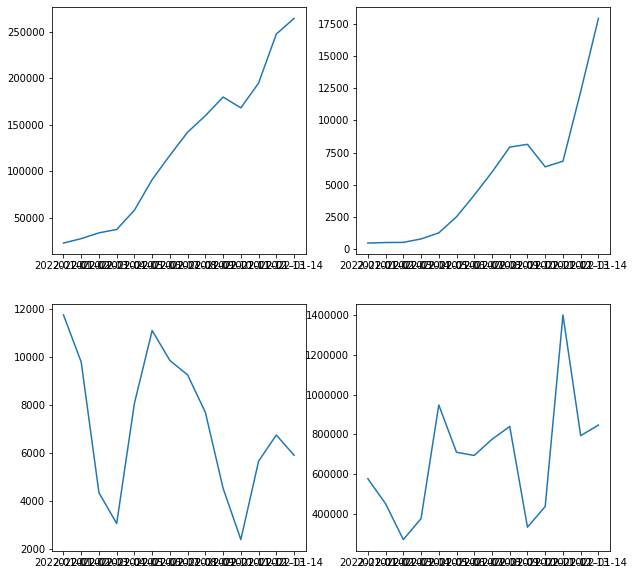

In [50]:
# axesの全要素でticklabel_formatを呼び出す
[[ax.ticklabel_format(style="plain",axis="y") 
  for ax in ax_temp] 
    for ax_temp in axes]
    
fig

## 日付の回転

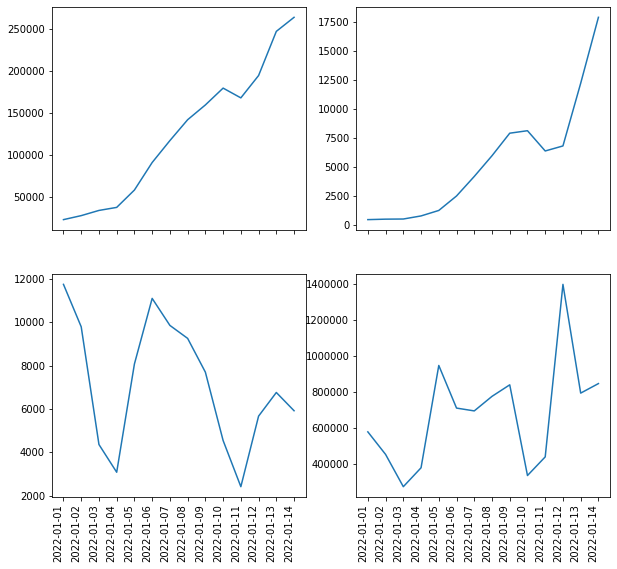

In [51]:
fig.autofmt_xdate(rotation=90)

fig

## ラベルの設定をする

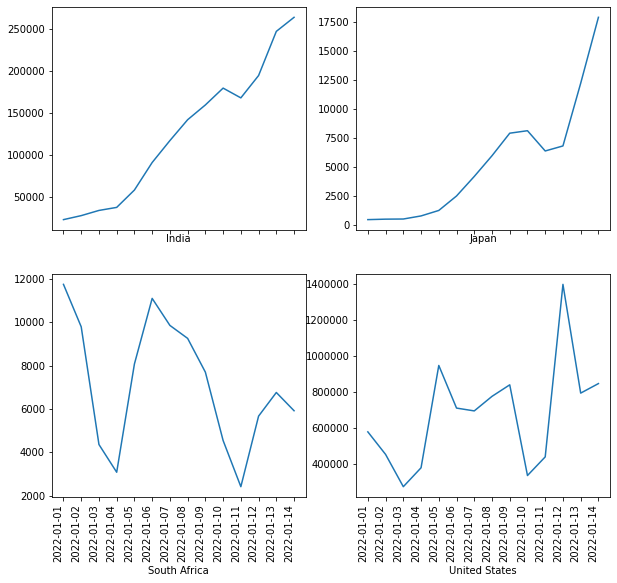

In [52]:
axes[0][0].set_xlabel("India")
axes[0][1].set_xlabel("Japan")
axes[1][0].set_xlabel("South Africa")
axes[1][1].set_xlabel("United States")

fig